In [90]:
import numpy as np
import matplotlib.pyplot as plt

u = np.load(r'Problem2-0.8-local\Problem2-0.8-local\u.npy')
v = np.load(r'Problem2-0.8-local\Problem2-0.8-local\v.npy')
x_eta = np.load(r'Problem2-0.8-local\Problem2-0.8-local\x_eta.npy')
x_xi = np.load(r'Problem2-0.8-local\Problem2-0.8-local\x_xi.npy')
y_eta = np.load(r'Problem2-0.8-local\Problem2-0.8-local\y_eta.npy')
y_xi = np.load(r'Problem2-0.8-local\Problem2-0.8-local\y_xi.npy')
data = np.load(r'Problem2-0.8-local\Problem2-0.8-local\grid_circle1.npz')
print("Keys in the .npz file:", data.keys())



In [91]:

x_key = 'X' 
y_key = 'Y' 

if x_key in data and y_key in data:
    x = data[x_key]
    y = data[y_key]
        # Flip xi direction
    x = np.flipud(x)
    y = np.flipud(y)
    grid_size = x.shape

    # Grid points and mesh size
    M_xi = grid_size[0] - 1
    M_eta = grid_size[1] - 1
    delta_xi = 1
    delta_eta = 1
    xi = np.arange(1, M_xi + 2)
    eta = np.arange(1, M_eta + 2)
    theta = ((xi - 1) * 2 * np.pi / M_xi).reshape(-1, 1)

    # Time step and CFL condition
    dt_cal = 0.00005

    # Physical parameters
    gamma = 1.4
    Ma = 0.8
    rho0 = np.ones_like(x)
    p0 = np.ones_like(x)
    a = np.sqrt(np.abs(gamma * p0 / rho0))  # Speed of sound

    u0 = Ma * a
    v0 = np.zeros_like(x)
    e0 = p0 / rho0 / (gamma - 1)
    E0 = e0 + 0.5 * (u0**2 + v0**2)
    Ber0 = 0.5 * (u0**2 + v0**2) + p0 / rho0  # Bernoulli constant

Keys in the .npz file: KeysView(<numpy.lib.npyio.NpzFile object at 0x000001C5C87F9A90>)


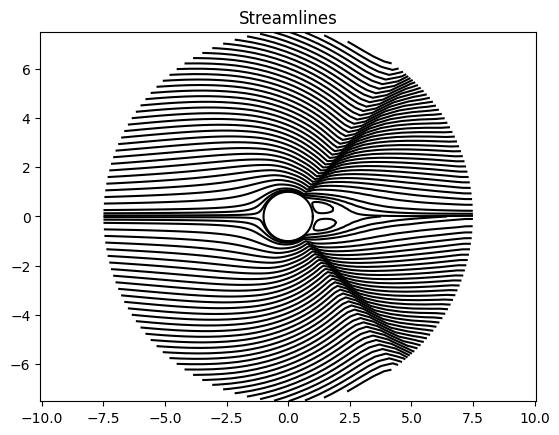

In [92]:
# plt.figure(16)
plt.plot(x[:, 0], y[:, 0], 'black')
f1_int = u * y_xi - v * x_xi
f2_int = u * y_eta - v * x_eta
psi = np.zeros((M_xi + 1, M_eta + 1))
for j in range(1, M_eta + 1):
    psi[:, j] = psi[:, j - 1] + (f2_int[:, j - 1] + f2_int[:, j]) / 2 * delta_eta 
specified_levels = [-1,-0.1,-0.02,0.03 ,0.1, 0.5, 0.7,1.0, 1.5, 2.0,2.5,3.0,3.5,4.0,4.5,5.0]
array = np.arange(0.2, 10, 0.2)
additional_elements = [-0.1, -0.02, 0.03, 0.1]
temp = np.append(-array, array)
temp = np.append(temp, additional_elements)
specified_levels = np.sort(temp)
plt.contour(x, y, psi, levels=specified_levels, colors='k', linestyles='solid')
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)
# plt.xlim(-4.5, 4.5)
# plt.ylim(-4.5, 4.5)
plt.title('Streamlines')
plt.axis('equal')
plt.savefig('Problem2-0.8-local/streamlines.png')